<a href="https://colab.research.google.com/github/RehabEmam228/Bertlesmann-challenge/blob/master/MNIST_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2020-01-27 09:08:20--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2020-01-27 09:08:25 (96.1 MB/s) - ‘helper.py’ saved [2813/2813]



In [0]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import helper

In [0]:
# implement mish activation function
def f_mish(input):
    '''
    Applies the mish function element-wise:
    mish(x) = x * tanh(softplus(x)) = x * tanh(ln(1 + exp(x)))
    '''
    return input * torch.tanh(F.softplus(input))

# implement class wrapper for mish activation function
class mish(nn.Module):
    '''
    Applies the mish function element-wise:
    mish(x) = x * tanh(softplus(x)) = x * tanh(ln(1 + exp(x)))

    Shape:
        - Input: (N, *) where * means, any number of additional
          dimensions
        - Output: (N, *), same shape as the input

    Examples:
        >>> m = mish()
        >>> input = torch.randn(2)
        >>> output = m(input)

    '''
    def __init__(self):
        '''
        Init method.
        '''
        super().__init__()

    def forward(self, input):
        '''
        Forward pass of the function.
        '''
        return f_mish(input)

In [0]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))
])
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

  0%|          | 40960/26421880 [00:00<01:11, 369264.20it/s]

26427392it [00:00, 78190901.03it/s]                            


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


32768it [00:00, 475166.13it/s]
  2%|▏         | 106496/4422102 [00:00<00:04, 1017757.81it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


4423680it [00:00, 22823398.17it/s]                           
8192it [00:00, 179241.70it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


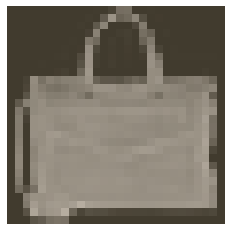

In [0]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [0]:
model = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(784, 256),
    mish(),
    nn.Dropout(0.5),
    nn.Linear(256, 128),
    mish(),
    nn.Dropout(0.5),
    nn.Linear(128, 10),
    mish(),
    nn.LogSoftmax(dim=1)
    
)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [0]:
epochs = 15
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
  model.train()
  running_loss=0
  for images , labels in trainloader:
    steps += 1
    # flatten images
    images = images.view(images.shape[0], -1)
    optimizer.zero_grad()
    output = model(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  else:
    test_loss = 0
    accuracy = 0
    with torch.no_grad():
      for images, labels in testloader:
        images = images.view(images.shape[0], -1)
        output = model(images)
        test_loss += criterion(output, labels)
        probabilities = torch.exp(output)
        top_p, top_class = probabilities.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
  train_losses.append(running_loss/len(trainloader))
  test_losses.append(test_loss/len(testloader))

  print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/15..  Training Loss: 0.712..  Test Loss: 0.615..  Test Accuracy: 0.774
Epoch: 2/15..  Training Loss: 0.578..  Test Loss: 0.584..  Test Accuracy: 0.794
Epoch: 3/15..  Training Loss: 0.558..  Test Loss: 0.574..  Test Accuracy: 0.798
Epoch: 4/15..  Training Loss: 0.543..  Test Loss: 0.574..  Test Accuracy: 0.796
Epoch: 5/15..  Training Loss: 0.531..  Test Loss: 0.567..  Test Accuracy: 0.794
Epoch: 6/15..  Training Loss: 0.527..  Test Loss: 0.561..  Test Accuracy: 0.803
Epoch: 7/15..  Training Loss: 0.522..  Test Loss: 0.552..  Test Accuracy: 0.799
Epoch: 8/15..  Training Loss: 0.514..  Test Loss: 0.551..  Test Accuracy: 0.807
Epoch: 9/15..  Training Loss: 0.510..  Test Loss: 0.556..  Test Accuracy: 0.813
Epoch: 10/15..  Training Loss: 0.510..  Test Loss: 0.558..  Test Accuracy: 0.799
Epoch: 11/15..  Training Loss: 0.509..  Test Loss: 0.543..  Test Accuracy: 0.804
Epoch: 12/15..  Training Loss: 0.505..  Test Loss: 0.550..  Test Accuracy: 0.804
Epoch: 13/15..  Training Loss: 0.505.

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

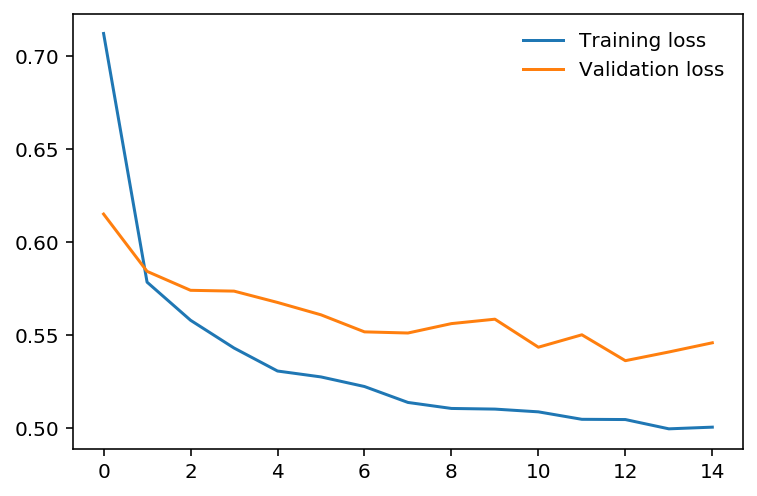

In [0]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

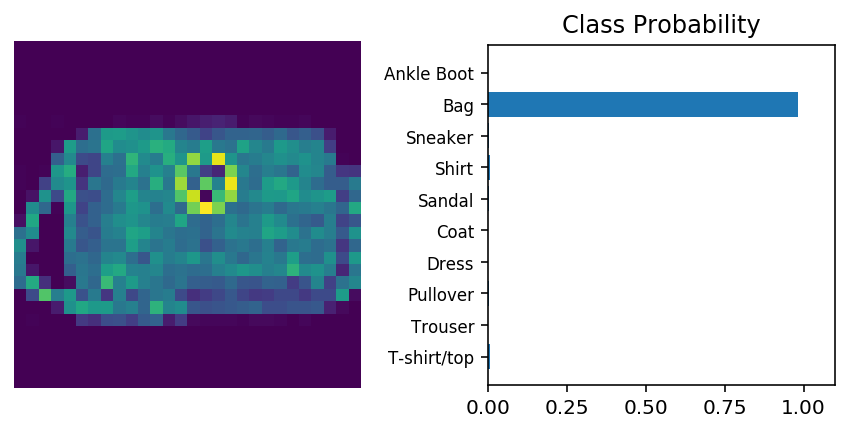

In [0]:
model.eval()

images, labels = next(iter(testloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model.forward(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')

In [0]:
torch.save(model.state_dict(), 'checkpoint.pth')